#  What is Data Scaling in ML and Why?


Data scaling transforms features to a similar scale so that no single feature dominates learning. It improves model performance, especially in algorithms like KNN, SVM, and gradient descent-based models. Without scaling, models may converge slowly or produce inaccurate results.

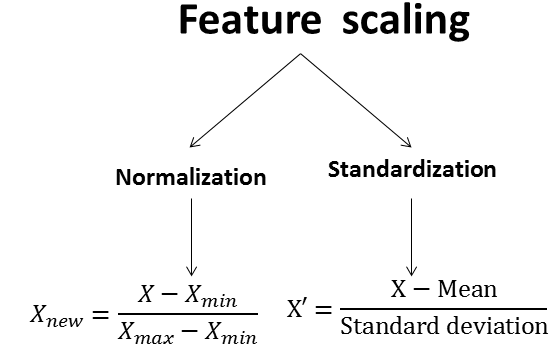







## Standarization in Scikit-learn (StandardScaler)

 mean = 0 and std = 1, 

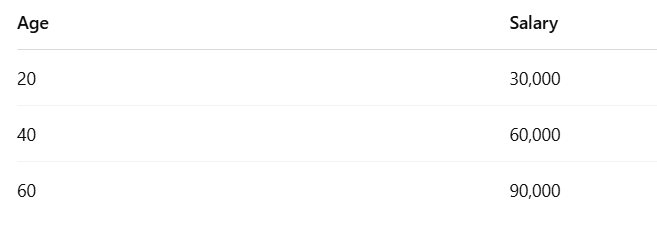


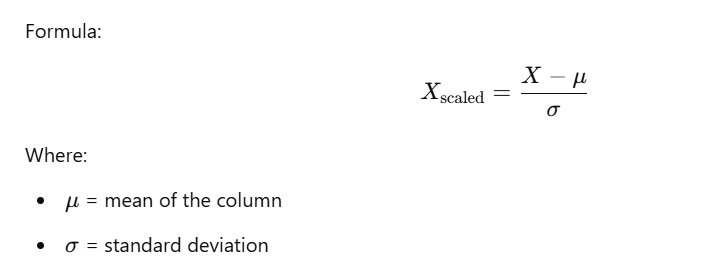


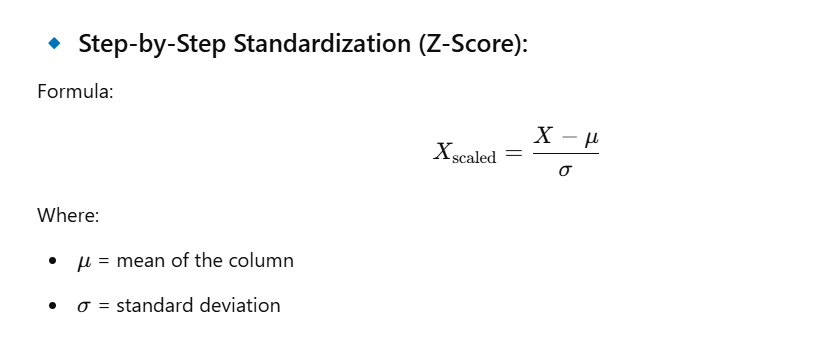


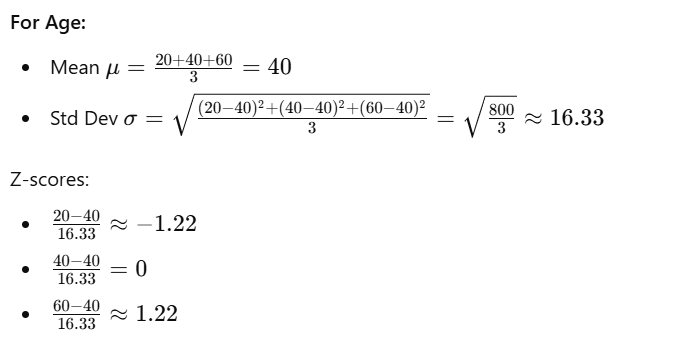


## Results: 
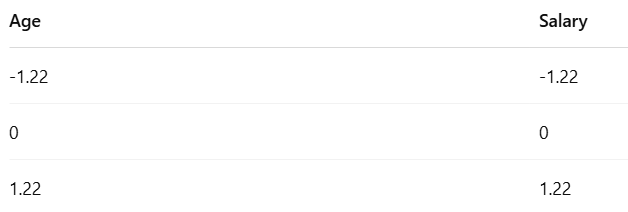


# Load Dataset

In [3]:
import pandas as pd 
df = pd.read_csv("Car Price Predicition.csv")
df.drop(columns=['name'],inplace=True)
df

year  selling_price  km_driven    fuel seller_type transmission  \
0     2007          60000      70000  Petrol  Individual       Manual   
1     2007         135000      50000  Petrol  Individual       Manual   
2     2012         600000     100000  Diesel  Individual       Manual   
3     2017         250000      46000  Petrol  Individual       Manual   
4     2014         450000     141000  Diesel  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
4335  2014         409999      80000  Diesel  Individual       Manual   
4336  2014         409999      80000  Diesel  Individual       Manual   
4337  2009         110000      83000  Petrol  Individual       Manual   
4338  2016         865000      90000  Diesel  Individual       Manual   
4339  2016         225000      40000  Petrol  Individual       Manual   

             owner  
0      First Owner  
1      First Owner  
2      First Owner  
3      First Owner  
4     Second Owner  
...            ...  
4335  Second Owner  
4336  Second Owner  
4337  Second Owner  
4338   First Owner  
4339   First Owner  

[4340 rows x 7 columns]

# 1 Data Preprocessing Step

# Encoding Categorical Column

In [4]:
from sklearn.preprocessing import OrdinalEncoder

# Select categorical columns to encode
categorical_cols = ['fuel', 'seller_type', 'transmission','owner']

# Create OrdinalEncoder instance
encoder = OrdinalEncoder()

# Apply encoding
df[categorical_cols] = encoder.fit_transform(df[categorical_cols]).astype(int)

df

year  selling_price  km_driven  fuel  seller_type  transmission  owner
0     2007          60000      70000     4            1             1      0
1     2007         135000      50000     4            1             1      0
2     2012         600000     100000     1            1             1      0
3     2017         250000      46000     4            1             1      0
4     2014         450000     141000     1            1             1      2
...    ...            ...        ...   ...          ...           ...    ...
4335  2014         409999      80000     1            1             1      2
4336  2014         409999      80000     1            1             1      2
4337  2009         110000      83000     4            1             1      2
4338  2016         865000      90000     1            1             1      0
4339  2016         225000      40000     4            1             1      0

[4340 rows x 7 columns]

# Scalling: Standarizatoin (standardscaler)

In [6]:
from sklearn.preprocessing import StandardScaler


# Select numerical columns to normalize
numerical_cols = ['year', 'km_driven']

# Initialize scaler
scaler = StandardScaler()

# Fit-transform on full data (only on numerical columns)
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

year  selling_price  km_driven  fuel  seller_type  transmission  \
0    -1.445074          60000   0.081139     4            1             1   
1    -1.445074         135000  -0.347689     4            1             1   
2    -0.258795         600000   0.724381     1            1             1   
3     0.927485         250000  -0.433455     4            1             1   
4     0.215717         450000   1.603479     1            1             1   
...        ...            ...        ...   ...          ...           ...   
4335  0.215717         409999   0.295553     1            1             1   
4336  0.215717         409999   0.295553     1            1             1   
4337 -0.970563         110000   0.359877     4            1             1   
4338  0.690229         865000   0.509967     1            1             1   
4339  0.690229         225000  -0.562103     4            1             1   

      owner  
0         0  
1         0  
2         0  
3         0  
4         2  
...     ...  
4335      2  
4336      2  
4337      2  
4338      0  
4339      0  

[4340 rows x 7 columns]

# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('selling_price', axis=1)  # Features
y = df['selling_price']              # Target

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shape
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (3472, 6)
Test shape: (868, 6)


# Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


R² Score: 0.39


# RandomForest 

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Random Forest Regressor): {r2:.2f}")


R² Score (Random Forest Regressor): 0.50
